In [1]:
from onset_functions import *
import datetime as dt
from inf_inj_time import *
from math import sqrt

time: 2.05 s (started: 2022-08-23 11:18:15 +03:00)


In [55]:
event_date = 20220602

#Path for the downloaded data
# path = '/home/smurf/solo/data/'
path = os.getcwd()+'/data/bepi'
#Path to save plots
file_path = f'/home/smurf/serpentine/eventlist/{event_date}/'
#Path for plot of highest peak flux and earliest onset time
#file_path_max = f'/home/smurf/serpentine/eventlist/{event_date}/max_{event_date}/'

#Plot time range
sdate = datetime.date(2021, 4, 17)
edate = datetime.date(2021, 4, 18)
plot_range = [dt.datetime(2021, 4, 17, 0),dt.datetime(2021, 4, 18, 23, 59)]

species = 'e'  # 'e' or 'p'

time: 1.48 ms (started: 2022-08-23 11:24:15 +03:00)


In [56]:
#Get event data
event_onset = Event(spacecraft='bepi', sensor='sixs', data_level='l2', species = species, start_date=sdate, end_date=edate, data_path=path)

time: 482 ms (started: 2022-08-23 11:24:16 +03:00)


In [57]:
#Particle type for filename
particle_type = 'BEPI_e'
# particle_ch = [2]  # 100 keV electrons
particle_ch = [5,6]  # ~1 MeV electrons
# particle_ch = [8,9]  # >25 MeV protons
#Add particle specific folder to file path
file_path = file_path + particle_type + '_' + str(event_date) + '/'

time: 908 µs (started: 2022-08-23 11:24:17 +03:00)


In [58]:
file_path

'/home/smurf/serpentine/eventlist/20220602/BEPI_e_20220602/'

time: 3.49 ms (started: 2022-08-23 11:24:17 +03:00)


# Event plots

In [63]:
#Determine resample period (e.g. 10min, 30S)

averaging = '1min' #'1min'

time: 397 µs (started: 2022-08-23 11:25:31 +03:00)


In [60]:
# Determine and adjust background start and length (e.g. 3, 8.1)

bg_start = 1
bg_length = 10

time: 445 µs (started: 2022-08-23 11:24:19 +03:00)


In [61]:
# viewing (called 'side' for Bepi/SIXS) can be '0', '1', '2'
# While '3' and '4' do exists, they should not be used, and are thus deactivated (commented) in the code!

viewing = '1'

time: 574 µs (started: 2022-08-23 11:24:20 +03:00)


##### >Energy channels< #####
1.4 MeV
#############################

##### >Flux peak< #####
2021-04-17 19:18:30    9.810562
Freq: T, dtype: float64
#######################

##### >Onset time< #####
2021-04-17 16:55:30
########################

##### >Mean of background intensity< #####
0.5515555955647006
##########################################

##### >Std of background intensity< #####
0.3384462588734176
#########################################

##### >Particle species< #####
electrons
##############################



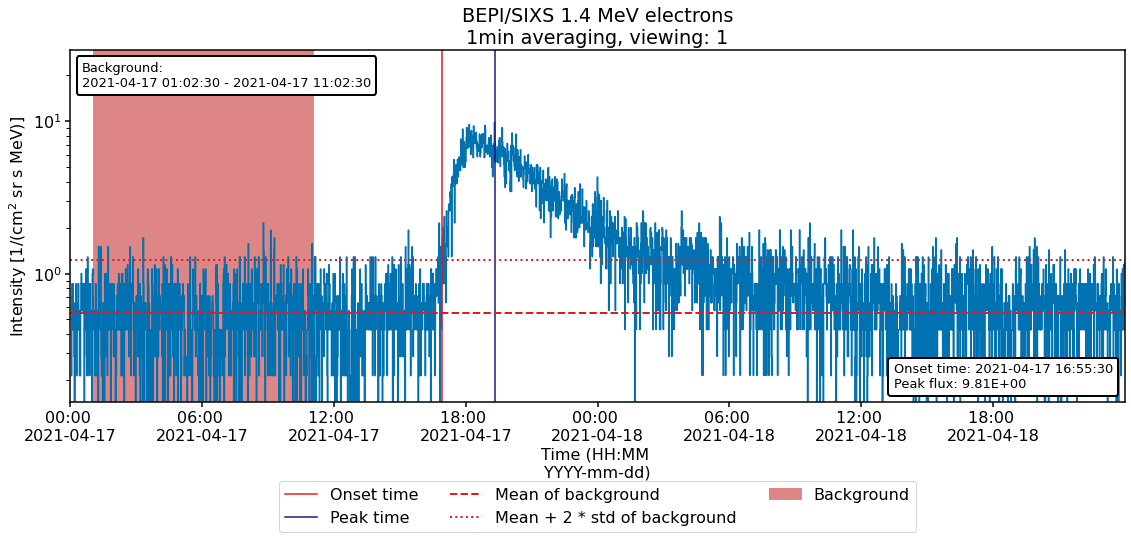

time: 864 ms (started: 2022-08-23 11:25:37 +03:00)


In [65]:
#Generate event plots for different viewing directions

flux, onset_stats, onset_found, peak_flux, peak_time, fig, bg_mean = event_onset.analyse(viewing=viewing, bg_start=bg_start, bg_length=bg_length, channels=particle_ch,
                                                                                         resample_period=averaging, yscale='log', cusum_window=30, xlim=plot_range)
onset = onset_stats[-1]
peak_flux = peak_flux.values[0]

In [20]:
flux

2021-04-17 00:02:24      0.0
2021-04-17 00:02:48      0.0
2021-04-17 00:03:12      0.0
2021-04-17 00:03:36      0.0
2021-04-17 00:04:00      0.0
                       ...  
2021-04-18 23:58:00    211.0
2021-04-18 23:58:24    211.0
2021-04-18 23:58:48    140.0
2021-04-18 23:59:12     87.8
2021-04-18 23:59:36    132.0
Name: E2, Length: 7192, dtype: float64

time: 4.42 ms (started: 2022-08-22 15:22:33 +03:00)


In [13]:
print(f"Onset: {onset}")
print(f"Peak flux: {peak_flux:.2E}")
print(f"Peak time: {peak_time}")
print(f"Bg mean: {bg_mean:.2E}")

Onset: 2021-04-17 16:31:30
Peak flux: 1.65E+04
Peak time: 2021-04-17 18:40:30
Bg mean: 2.65E+00
time: 1.02 ms (started: 2022-08-22 15:13:46 +03:00)


# Saving figures

In [19]:
#Create file name for maximum peak flux plot (if averaging is 10min)
filename_flux = f'{file_path}BEPI_{particle_type}_{event_date}_{averaging}.png'

time: 600 µs (started: 2022-08-17 15:27:18 +03:00)


In [20]:
#Check right filename
filename_flux

'/home/smurf/serpentine/eventlist/20211028/EPHIN_e_20211028/SOHO_EPHIN_e_20211028_10min.png'

time: 3.65 ms (started: 2022-08-17 15:27:19 +03:00)


In [12]:
#Save maximum peak flux plot
fig.savefig(filename_flux, facecolor= 'white', transparent=False)

time: 199 ms (started: 2022-08-17 15:25:33 +03:00)


# Inferred injection time

In [14]:
geom_mean = sqrt(25*40)

time: 1.52 ms (started: 2022-08-22 15:13:53 +03:00)


In [15]:
inj_time, distance = inf_inj_time('Bepi', onset.to_pydatetime(), 'p', geom_mean, 400)

INFO: Obtained JPL HORIZONS location for BepiColombo (Spacecraft) (-121) [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for Sun (10) [sunpy.coordinates.ephemeris]
time: 2.7 s (started: 2022-08-22 15:13:55 +03:00)


In [16]:
print(pd.Timestamp(inj_time))
print(f"{distance:.2F}")

2021-04-17 16:09:30.395435
0.67 AU
time: 3.13 ms (started: 2022-08-22 15:14:02 +03:00)
